# Apresentação:

O objetivo desse código é estudar sobre o **SVM**, ***Support Vector Machine***, como uma generalização do ***Support Vector Classifier***, ou seja, no contexto de **classificação**. O material aqui utilizado, será o **An Introduction to Statistical Learning** de *Trevor Hastie*, *Robert Tibshirani* e *Jonathan Taylor*, com o suporte teórico do **The Elements of Statistical Learning** de *Trevor Hastie*, *Robert Tibshirani* e *Jerome Friedman*.

O livro **An Introduction to Statistical Learning**, diferente do **Hands On Machine Learning with Scikit Learn Keras and Tensorflow** de *Aurélien Géron*, apresenta o **SVM** como uma generalização do **SVC** para uma dimensão linearmente separável, ou seja, aqui vamos estudar sobre essa ótica.

## Documentações:
* https://scikit-learn.org/stable/api/sklearn.svm.html#module-sklearn.svm
* https://islp.readthedocs.io/en/latest/index.html

In [47]:
# Bibliotecas utilizadas:
import numpy as np
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

# Importações para visualizações:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots, cm

In [42]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay,confusion_matrix

Usaremos a função `RocCurveDisplay.from_estimator()` para produzir 
vários gráficos ROC, usando uma abreviatura` roc_curv`e.

In [11]:
# Instanciando Método de Métrica:
roc_curve = RocCurveDisplay.from_estimator # shorthand

# *Support Vector Classifier* - SVC:


Agora usamos a função `SupportVectorClassifier()` (abreviada `SVC()`) do sklearn para encontrar o classificador do vetor de suporte para um determinado valor do parâmetro C. O argumento C nos permite especificar o custo de uma violação para a margem. Quando o argumento do custo é pequeno, então as margens serão ampla e muitos vetores de apoio ficarão à margem ou violarão a
margem. Quando o argumento C é grande, as margens serão estreitas e haverá poucos vetores de suporte na margem ou violando a margem.

Aqui demonstramos o uso de `SVC()` em um exemplo bidimensional, então que podemos traçar o limite de decisão resultante. Começamos gerando as observações, que pertencem a duas classes, e verificando se o as classes são linearmente separáveis.

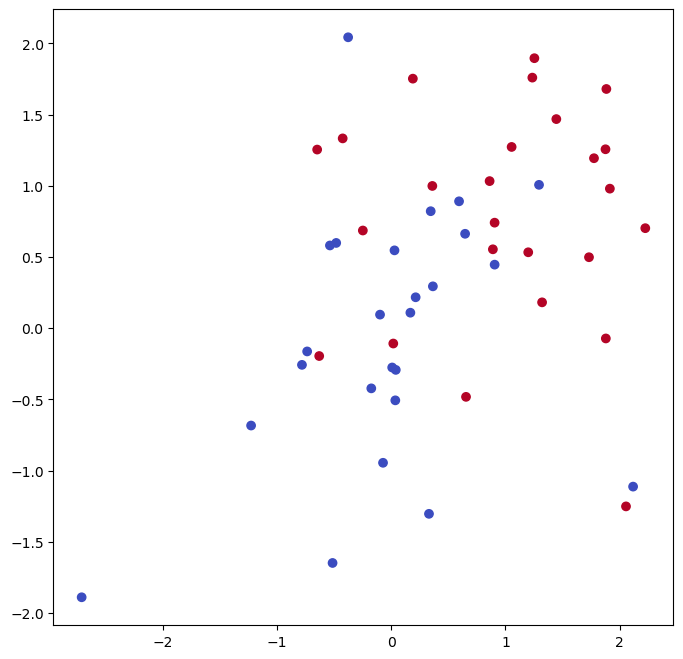

In [25]:
# Gerando dados artificiais:
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25+[1]*25)

# Separando dados:
X[y==1] += 1

# Gerando Visualização:
fig,ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);

In [26]:
# Gerando dados:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

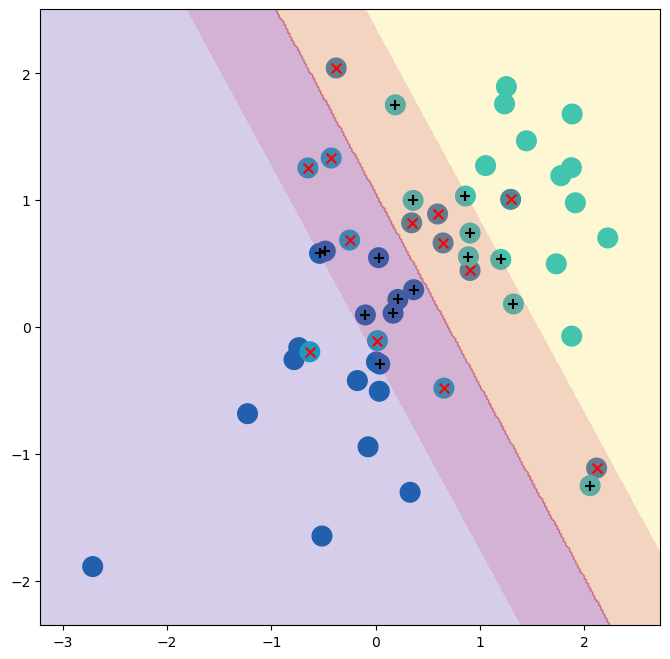

In [28]:
# Gerando Visualização:
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y, svm_linear, ax=ax)

# *Support Vector Machine* - SVM

Para instalar um SVM usando um kernel não linear, mais uma vez usamos o Estimador SVC(). No entanto, agora usamos um valor diferente do parâmetro núcleo. Para instalar um SVM com um kernel polinomial usamos kernel="poly", e para instalar um SVM com kernel radial usamos kernel="rbf". No primeiro caso também usamos o argumento de grau para especificar um grau para o polinômio kernel (isto é d em (9.22)), e no último caso usamos gama para especificar um valor de γ para o kernel de base radial (9.24). Primeiro geramos alguns dados com um limite de classe não linear, como segue:

In [30]:
# Gerando Dados artificiais:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

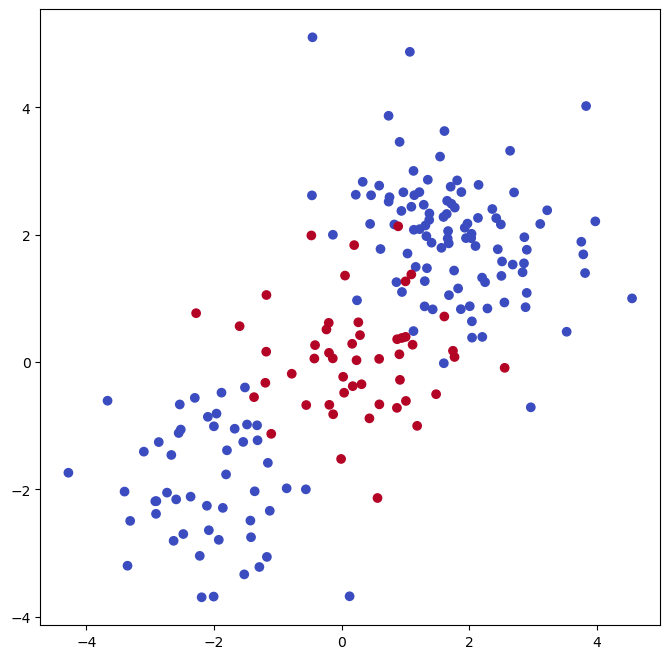

In [31]:
# Visualização dos dados:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y,
           cmap=cm.coolwarm);

Os dados são divididos aleatoriamente em grupos de treinamento e teste. Nós então começamos os dados de treinamento usando o estimador `SVC()` com kernel radial e $\gamma$ = 1

In [32]:
# Splitando dados:
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, y, test_size=0.5, random_state=0)

In [33]:
# Instanciando Modelo:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, y_train) # Fit

SVC(C=1, gamma=1)

O gráfico mostra que o **SVM** resultante tem um **limite decididamente não linear**.

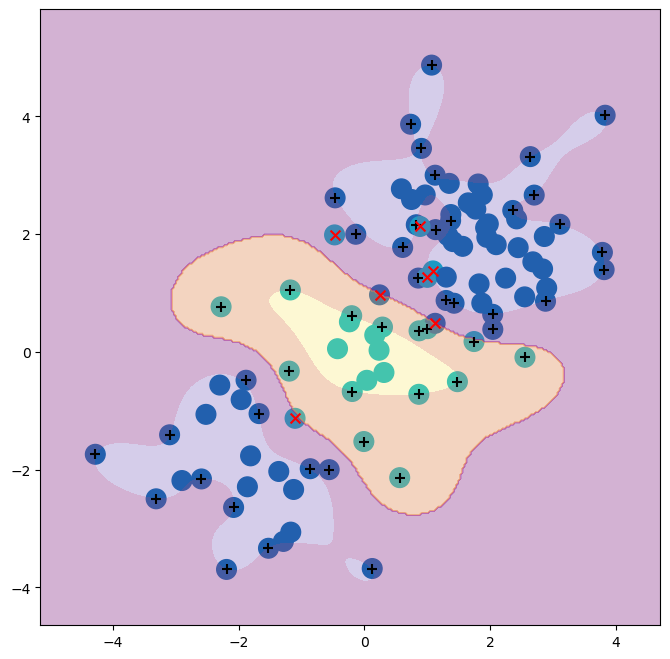

In [35]:
# Visualização do Resultado:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

Podemos ver pela figura que há um bom número de erros de treinamento neste **SVM**. Se aumentarmos o valor de `C`, podemos reduzir o número de erros de treinamento. No entanto, isto tem o preço de uma abordagem mais irregular limite de decisão que parece estar em risco de ultrapassar os dados. Esse processo de escolha adequada do `C` é uma situação de **otimização de hiperparâmetros**. Podemos realizar validação cruzada usando `skm.GridSearchCV()` para selecionar o melhor escolha de $\gamma$ e `C` para um SVM com kernel radial.

In [36]:
# Instanciando kfold
kfold = skm.KFold(5, # 5 grupos
        random_state=0,
        shuffle=True)

In [39]:
# Gerando Pipeline de Otimização:
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,10,100,1000],
                        'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')

# otimizando Hiperparâmetros
grid.fit(X_train, y_train)
grid.best_params_ # Valores ótimos

{'C': 100, 'gamma': 0.5}

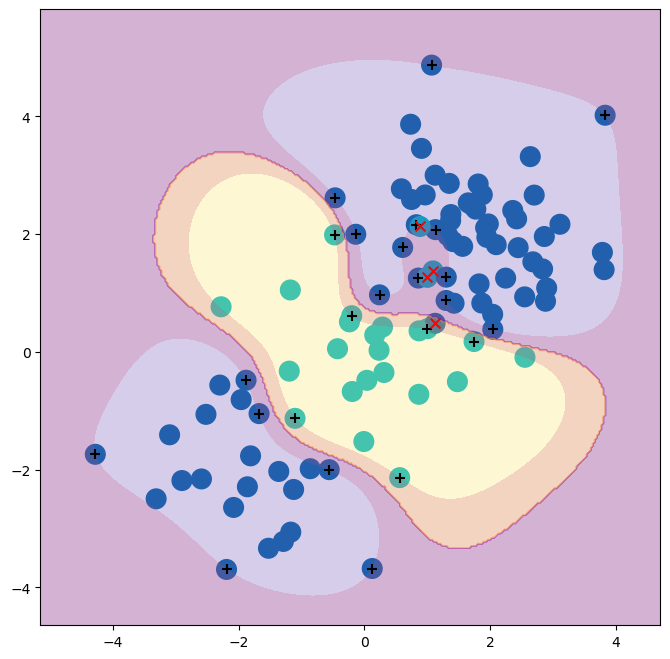

In [40]:
# Visualizando elementos:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,y_train,
         best_svm,
         ax=ax);

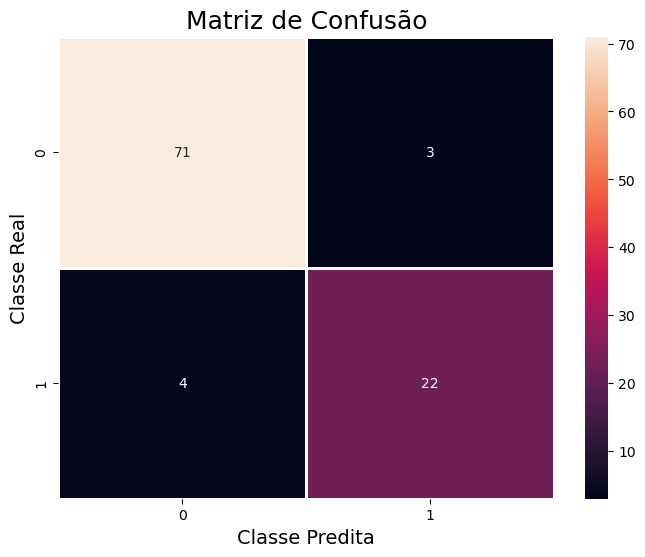

In [48]:
# Gerando Predição e Matriz de Confusão:
y_hat_test = best_svm.predict(X_test)
mConfusion = confusion_matrix(y_hat_test, y_test)

# Configurando o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o heatmap
sns.heatmap(mConfusion, annot=True, fmt='d', cbar=True, linewidths=1)

# Adicionando títulos e rótulos
plt.title('Matriz de Confusão', fontsize=18)
plt.xlabel('Classe Predita', fontsize=14)
plt.ylabel('Classe Real', fontsize=14)

# Exibindo o gráfico
plt.show()

In [49]:
from sklearn.metrics import classification_report

In [54]:
# Avaliando Modelo:
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           1       0.96      0.95      0.95        75
           2       0.85      0.88      0.86        25

    accuracy                           0.93       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.93      0.93      0.93       100



In [60]:
print(
    f'''
    Com estes parâmetros, {round((mConfusion[0][1]+mConfusion[1][0])/sum(sum(mConfusion))*100,)}% das observações de teste são
    classificadas incorretamente por este SVM.
    '''
)


    Com estes parâmetros, 7% das observações de teste são
    classificadas incorretamente por este SVM.
    


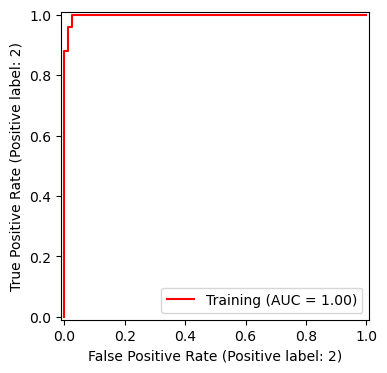

In [63]:
fig, ax = subplots(figsize=(4,4))
roc_curve(best_svm, X_train, y_train, 
            name='Training', color='r',
            ax=ax);

Neste exemplo, o SVM parece fornecer previsões precisas. Por aumentando $\gamma$ podemos produzir um ajuste mais flexível e gerar melhorias adicionais na precisão.

In [65]:
# Instanciando SVM mais Flexivel:
svm_flex = SVC(kernel="rbf",gamma=50,C=1)
svm_flex.fit(X_train, y_train)

SVC(C=1, gamma=50)

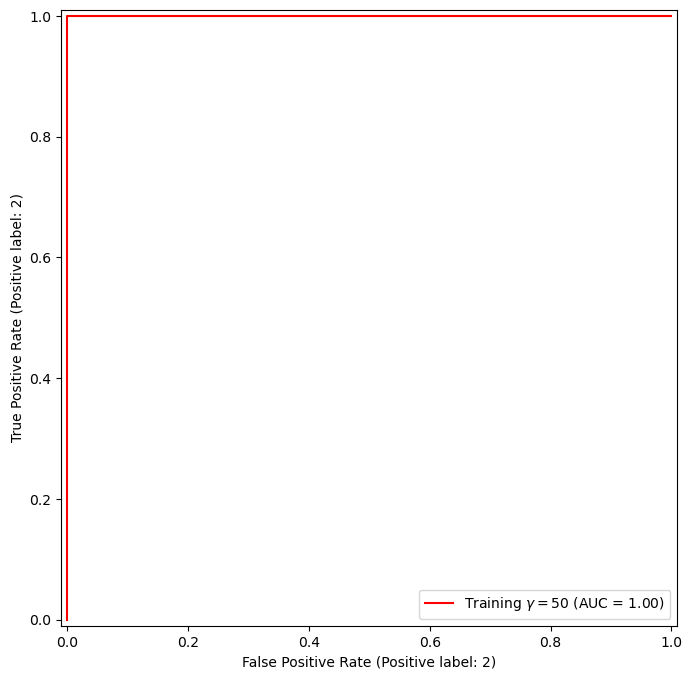

In [66]:
fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex, X_train, y_train, name='Training $\gamma=50$', color='r', ax=ax);

No entanto, essas curvas ROC estão todas nos dados de treinamento. Nós estamos realmente
mais interessado no nível de precisão da previsão nos dados de teste. Quando
calculamos as curvas ROC nos dados de teste, o modelo com $\gamma$ = 0,5
parece fornecer os resultados mais precisos.

In [68]:
roc_curve(svm_flex, X_test, y_test, name='Test $\gamma=50$', color='b', ax=ax)
fig;

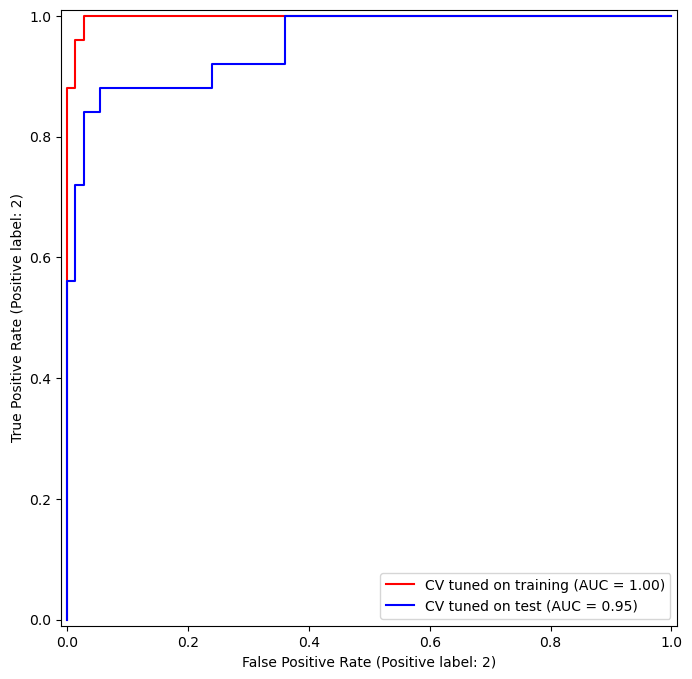

In [69]:
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip( (X_train, X_test), (y_train, y_test), ('r', 'b'), ('CV tuned on training', 'CV tuned on test')):
    roc_curve(best_svm,X_,y_,name=name,ax=ax,color=c)